<a href="https://colab.research.google.com/github/pushparani7/OIBSIP_Datascience_2/blob/main/Sales(Oasis_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: IMPORT REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("✓ All libraries imported successfully!")
print("="*70)

✓ All libraries imported successfully!


# **STEP 2: UPLOAD AND LOAD DATASET**

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

print("\n" + "="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)

print(f"\nDataset shape: {df.shape}")
print(f"Total records: {len(df)}")
print(f"Total features: {df.shape[1]}")

print("\n--- First 10 rows of the dataset ---")
print(df.head(10))

print("\n--- Dataset Information ---")
print(df.info())


DATASET LOADED SUCCESSFULLY

Dataset shape: (200, 5)
Total records: 200
Total features: 5

--- First 10 rows of the dataset ---
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-nu

# **STEP 3: EXPLORATORY DATA ANALYSIS (EDA)**


EXPLORATORY DATA ANALYSIS (EDA)

--- Descriptive Statistics ---
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

--- Missing Values ---
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

--- Correlation Matrix ---
            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radi

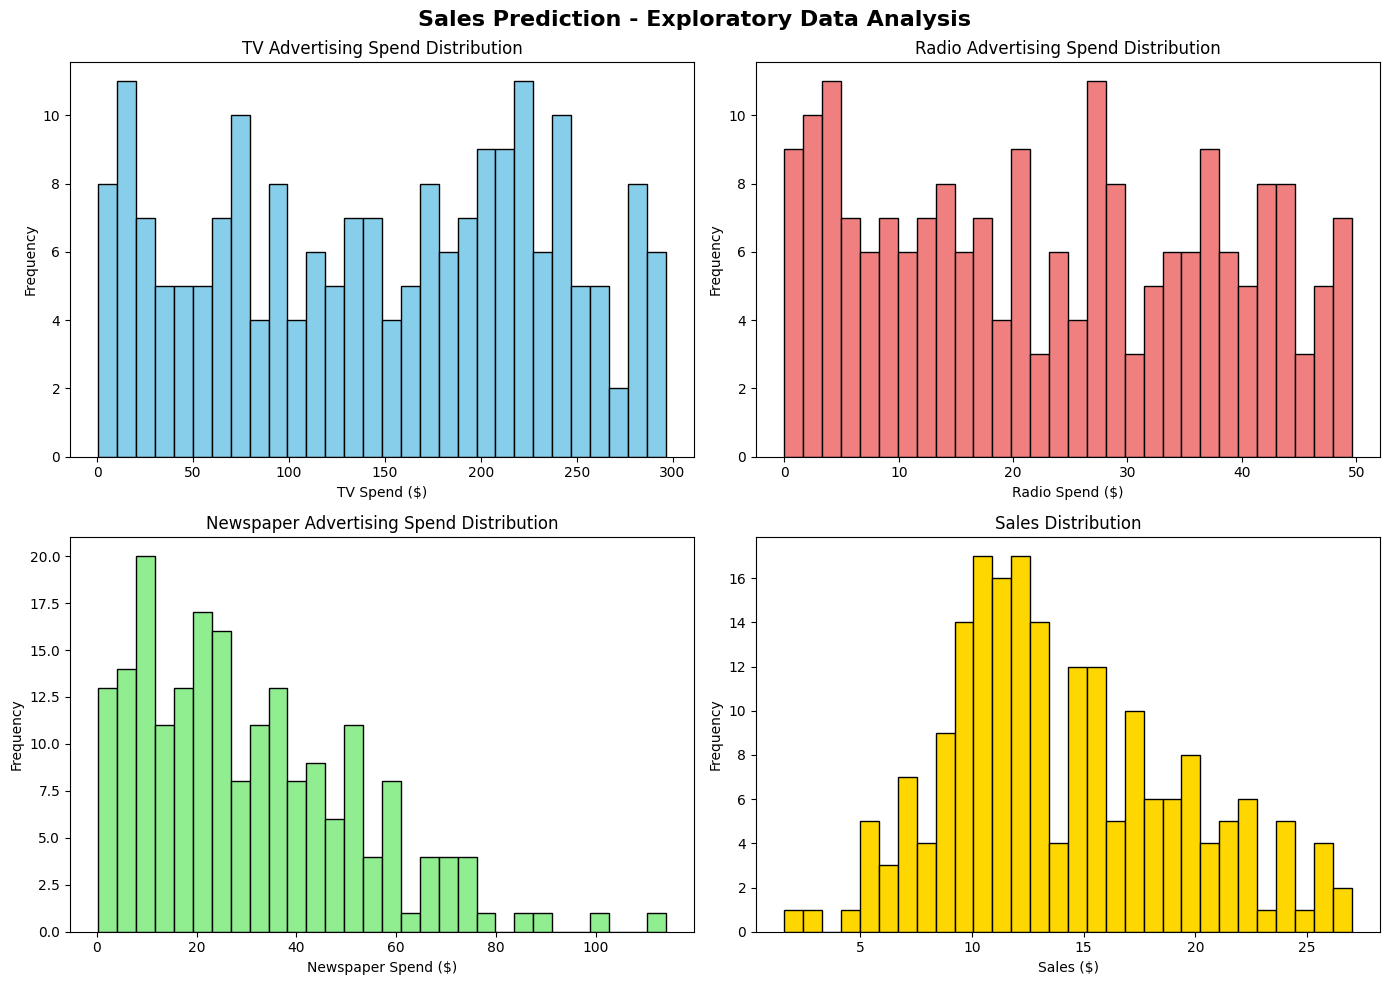

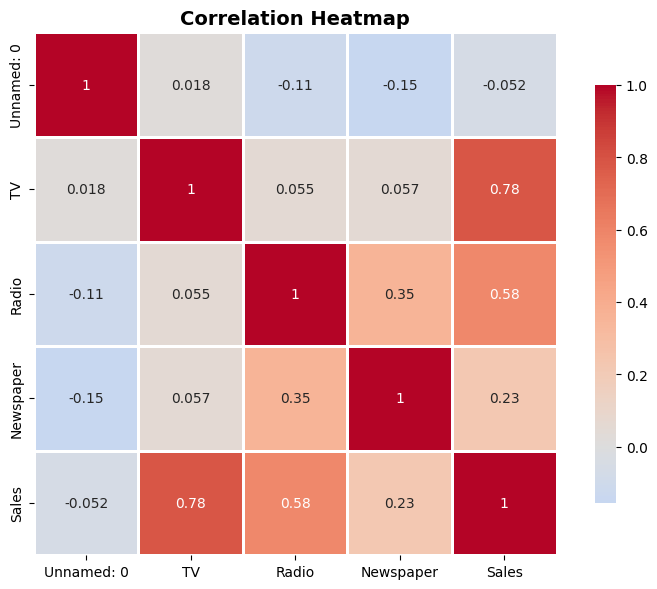

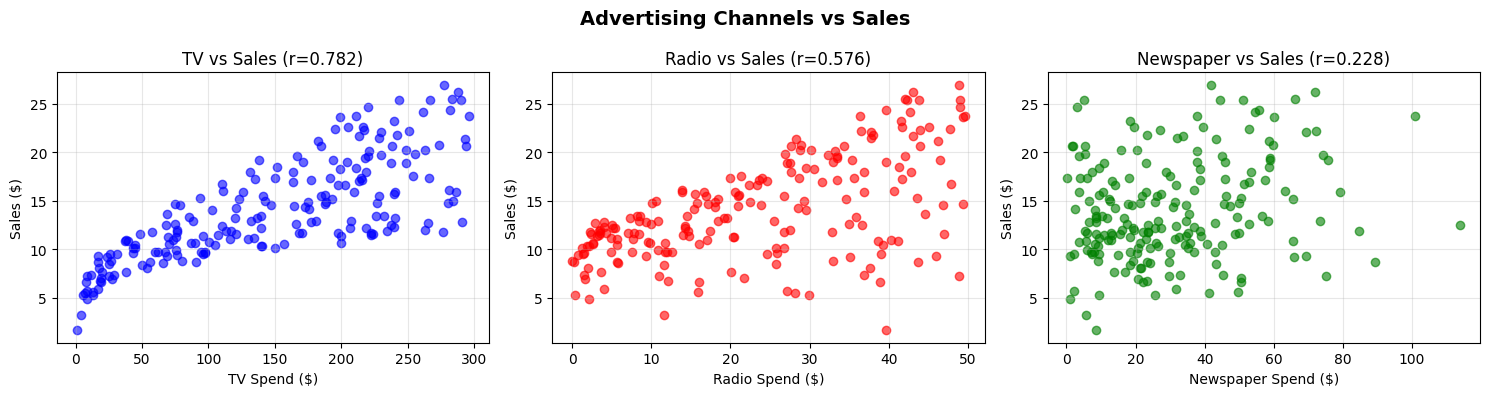

In [ ]:
print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Correlation Matrix ---")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize distributions and relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Prediction - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Distribution of TV Spend
axes[0, 0].hist(df['TV'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('TV Advertising Spend Distribution')
axes[0, 0].set_xlabel('TV Spend ($)')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Radio Spend
axes[0, 1].hist(df['Radio'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Radio Advertising Spend Distribution')
axes[0, 1].set_xlabel('Radio Spend ($)')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Newspaper Spend
axes[1, 0].hist(df['Newspaper'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Newspaper Advertising Spend Distribution')
axes[1, 0].set_xlabel('Newspaper Spend ($)')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Sales
axes[1, 1].hist(df['Sales'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Sales Distribution')
axes[1, 1].set_xlabel('Sales ($)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Scatter plots: Advertising channels vs Sales
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Advertising Channels vs Sales', fontsize=14, fontweight='bold')

axes[0].scatter(df['TV'], df['Sales'], alpha=0.6, color='blue')
axes[0].set_xlabel('TV Spend ($)')
axes[0].set_ylabel('Sales ($)')
axes[0].set_title(f'TV vs Sales (r={df["TV"].corr(df["Sales"]):.3f})')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Radio'], df['Sales'], alpha=0.6, color='red')
axes[1].set_xlabel('Radio Spend ($)')
axes[1].set_ylabel('Sales ($)')
axes[1].set_title(f'Radio vs Sales (r={df["Radio"].corr(df["Sales"]):.3f})')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df['Newspaper'], df['Sales'], alpha=0.6, color='green')
axes[2].set_xlabel('Newspaper Spend ($)')
axes[2].set_ylabel('Sales ($)')
axes[2].set_title(f'Newspaper vs Sales (r={df["Newspaper"].corr(df["Sales"]):.3f})')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **STEP 4: DATA PREPROCESSING**

In [ ]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Create a copy for processing
df_processed = df.copy()

# Drop the index column if it exists
if '' in df_processed.columns:
    df_processed = df_processed.drop('', axis=1)

print("\nProcessed dataset shape:", df_processed.shape)
print("Processed dataset columns:", df_processed.columns.tolist())
print("\nProcessed dataset (first 5 rows):")
print(df_processed.head())


DATA PREPROCESSING

Processed dataset shape: (200, 5)
Processed dataset columns: ['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

Processed dataset (first 5 rows):
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# **STEP 5: SEPARATE FEATURES AND TARGET VARIABLE**

In [ ]:
print("\n" + "="*70)
print("FEATURE AND TARGET SEPARATION")
print("="*70)

X = df_processed.drop('Sales', axis=1)  # Features: TV, Radio, Newspaper
y = df_processed['Sales']                # Target: Sales

print("\nFeatures (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {X.columns.tolist()}")
print("\nTarget (y):")
print(f"  Shape: {y.shape}")

print("\nFeatures (first 5 rows):")
print(X.head())
print("\nTarget (first 5 values):")
print(y.head())


FEATURE AND TARGET SEPARATION

Features (X):
  Shape: (200, 4)
  Columns: ['Unnamed: 0', 'TV', 'Radio', 'Newspaper']

Target (y):
  Shape: (200,)

Features (first 5 rows):
   Unnamed: 0     TV  Radio  Newspaper
0           1  230.1   37.8       69.2
1           2   44.5   39.3       45.1
2           3   17.2   45.9       69.3
3           4  151.5   41.3       58.5
4           5  180.8   10.8       58.4

Target (first 5 values):
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


# **STEP 6: SPLIT DATA INTO TRAINING AND TESTING SETS**

In [ ]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nOriginal dataset size: {len(X)}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")



TRAIN-TEST SPLIT

Original dataset size: 200
Training set size: 160 (80.0%)
Testing set size: 40 (20.0%)

Training features shape: (160, 4)
Testing features shape: (40, 4)


# **STEP 7: FEATURE SCALING (STANDARDIZATION)**

In [ ]:
print("\n" + "="*70)
print("FEATURE SCALING (STANDARDIZATION)")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled successfully!")
print(f"\nScaling parameters:")
print(f"  Mean: {scaler.mean_}")
print(f"  Std Dev: {scaler.scale_}")

print("\nOriginal X_train (first 3 rows):")
print(X_train.head(3))
print("\nScaled X_train (first 3 rows):")
print(X_train_scaled[:3])


FEATURE SCALING (STANDARDIZATION)

✓ Features scaled successfully!

Scaling parameters:
  Mean: [100.075    150.019375  22.875625  29.945625]
  Std Dev: [59.18905621 84.15463408 14.75887761 20.27279842]

Original X_train (first 3 rows):
     Unnamed: 0     TV  Radio  Newspaper
79           80  116.0    7.7       23.1
197         198  177.0    9.3        6.4
38           39   43.1   26.7       35.1

Scaled X_train (first 3 rows):
[[-0.33916743 -0.40424839 -1.02823707 -0.33767538]
 [ 1.65444436  0.32060772 -0.91982774 -1.16143931]
 [-1.03186305 -1.27051084  0.2591237   0.25425079]]


# **STEP 8: BUILD AND TRAIN MODELS**

In [ ]:
print("\n" + "="*70)
print("MODEL TRAINING")
print("="*70)

# Model 1: Linear Regression
print("\n1. Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("   ✓ Linear Regression trained!")

print(f"\n   Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"     {feature}: {coef:.4f}")
print(f"   Intercept: {lr_model.intercept_:.4f}")

# Model 2: Random Forest Regressor
print("\n2. Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
print("   ✓ Random Forest Regressor trained!")


MODEL TRAINING

1. Training Linear Regression...
   ✓ Linear Regression trained!

   Coefficients:
     Unnamed: 0: 0.0381
     TV: 3.7633
     Radio: 2.7931
     Newspaper: 0.0617
   Intercept: 14.1000

2. Training Random Forest Regressor...
   ✓ Random Forest Regressor trained!


# **STEP 9: MAKE PREDICTIONS**

In [ ]:
print("\n" + "="*70)
print("MAKING PREDICTIONS")
print("="*70)

# Predictions on test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nFirst 10 Predictions Comparison:")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'LR_Prediction': y_pred_lr[:10],
    'RF_Prediction': y_pred_rf[:10]
})
print(comparison_df)


MAKING PREDICTIONS

First 10 Predictions Comparison:
   Actual  LR_Prediction  RF_Prediction
0    16.9      16.412277      17.761655
1    22.4      20.843193      21.606000
2    21.4      21.511869      20.604000
3     7.3      10.653100       6.652000
4    24.7      22.124058      22.923000
5    12.6      13.123835      13.558000
6    22.3      21.037489      22.321900
7     8.4       7.503854       9.722040
8    11.5      13.647870      11.819500
9    14.9      15.120409      15.505250


# **STEP 10: EVALUATE MODELS**

In [ ]:
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

# Linear Regression Evaluation
print("\n--- LINEAR REGRESSION PERFORMANCE ---")
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"  Mean Squared Error (MSE):       {lr_mse:.6f}")
print(f"  Root Mean Squared Error (RMSE): {lr_rmse:.6f}")
print(f"  Mean Absolute Error (MAE):      {lr_mae:.6f}")
print(f"  R-squared (R²) Score:           {lr_r2:.6f}")

# Random Forest Evaluation
print("\n--- RANDOM FOREST PERFORMANCE ---")
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"  Mean Squared Error (MSE):       {rf_mse:.6f}")
print(f"  Root Mean Squared Error (RMSE): {rf_rmse:.6f}")
print(f"  Mean Absolute Error (MAE):      {rf_mae:.6f}")
print(f"  R-squared (R²) Score:")


MODEL EVALUATION

--- LINEAR REGRESSION PERFORMANCE ---
  Mean Squared Error (MSE):       3.199004
  Root Mean Squared Error (RMSE): 1.788576
  Mean Absolute Error (MAE):      1.465060
  R-squared (R²) Score:           0.898649

--- RANDOM FOREST PERFORMANCE ---
  Mean Squared Error (MSE):       0.701216
  Root Mean Squared Error (RMSE): 0.837386
  Mean Absolute Error (MAE):      0.682234
  R-squared (R²) Score:


# **STEP 11: VISUALIZE MODEL PERFORMANCE**


MODEL PERFORMANCE VISUALIZATION


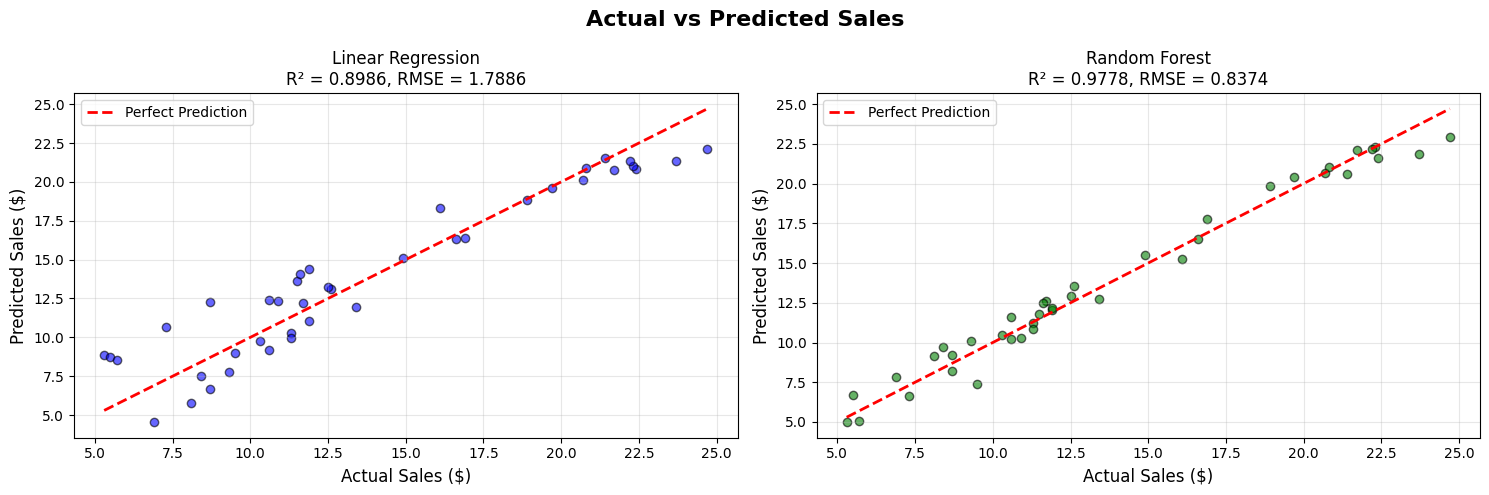

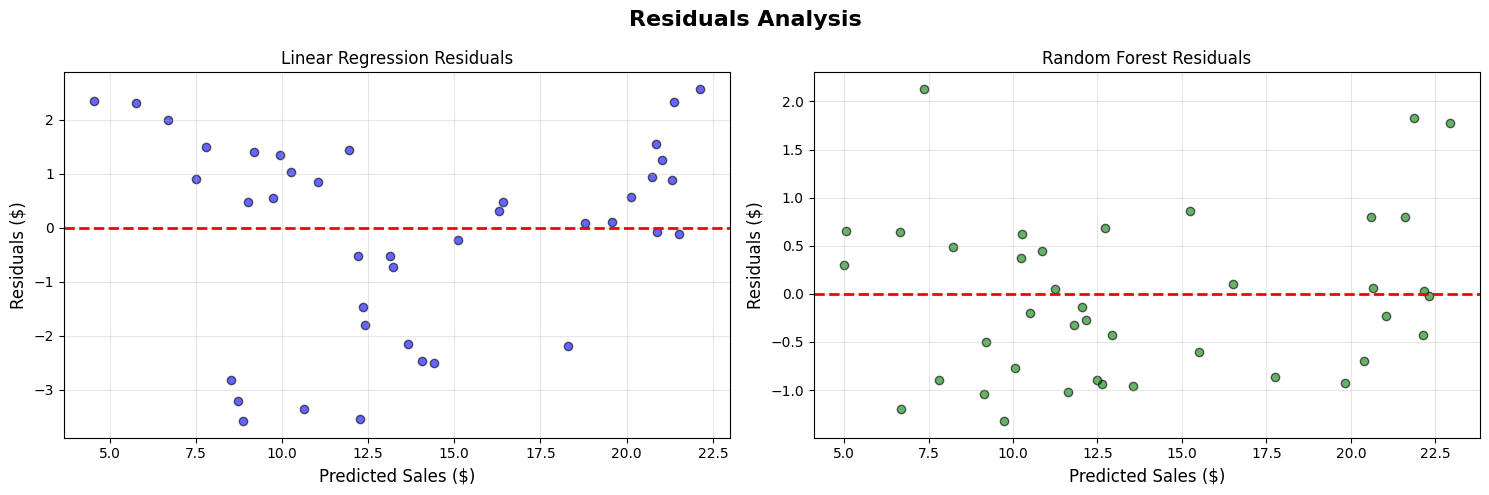

In [ ]:
print("\n" + "="*70)
print("MODEL PERFORMANCE VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Actual vs Predicted Sales', fontsize=16, fontweight='bold')

# Linear Regression Plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue', edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Sales ($)', fontsize=12)
axes[0].set_ylabel('Predicted Sales ($)', fontsize=12)
axes[0].set_title(f'Linear Regression\nR² = {lr_r2:.4f}, RMSE = {lr_rmse:.4f}', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Random Forest Plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales ($)', fontsize=12)
axes[1].set_ylabel('Predicted Sales ($)', fontsize=12)
axes[1].set_title(f'Random Forest\nR² = {rf_r2:.4f}, RMSE = {rf_rmse:.4f}', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Residuals Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Residuals Analysis', fontsize=16, fontweight='bold')

residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

axes[0].scatter(y_pred_lr, residuals_lr, alpha=0.6, color='blue', edgecolor='black')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Sales ($)', fontsize=12)
axes[0].set_ylabel('Residuals ($)', fontsize=12)
axes[0].set_title('Linear Regression Residuals', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_pred_rf, residuals_rf, alpha=0.6, color='green', edgecolor='black')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Sales ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Random Forest Residuals', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **STEP 12: FEATURE IMPORTANCE (Random Forest)**


FEATURE IMPORTANCE ANALYSIS

Feature Importance (Random Forest):
      Feature  Importance
1          TV    0.622236
2       Radio    0.359719
3   Newspaper    0.012214
0  Unnamed: 0    0.005831

Interpretation:
  TV: 62.22%
  Radio: 35.97%
  Newspaper: 1.22%
  Unnamed: 0: 0.58%


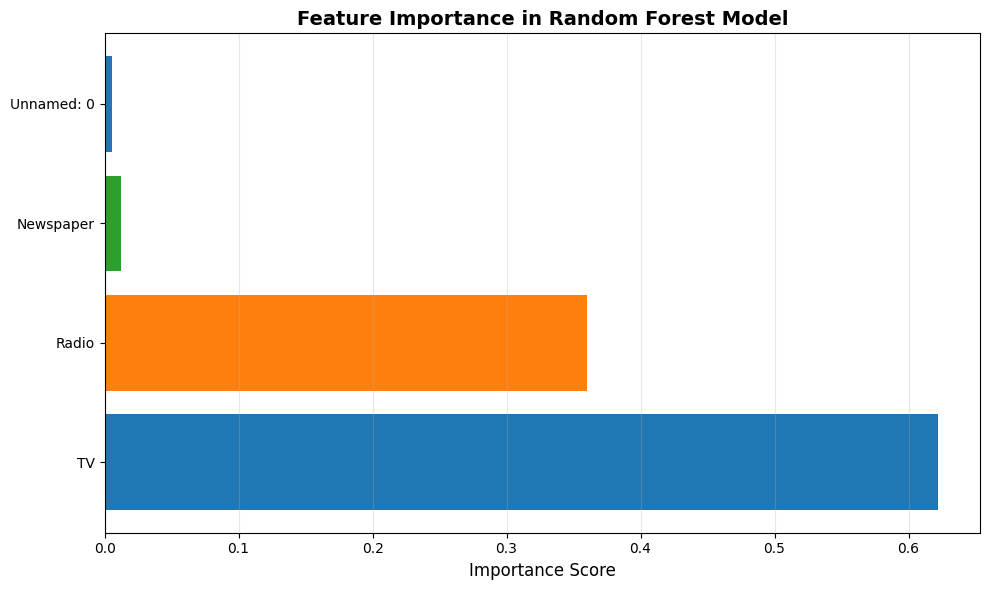

In [ ]:
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)
print(f"\nInterpretation:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']*100:.2f}%")

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# **STEP 13: MAKE PREDICTIONS ON NEW DATA**

In [ ]:
print("\n" + "="*70)
print("PREDICT SALES FOR NEW ADVERTISING CAMPAIGNS")
print("="*70)

# Example 1: High TV spend
new_data_1 = pd.DataFrame({
    'Unnamed: 0': [0], # Added 'Unnamed: 0' column with a dummy value
    'TV': [250],
    'Radio': [40],
    'Newspaper': [30]
})

# Example 2: Balanced spend
new_data_2 = pd.DataFrame({
    'Unnamed: 0': [0], # Added 'Unnamed: 0' column with a dummy value
    'TV': [150],
    'Radio': [25],
    'Newspaper': [20]
})

# Example 3: Low spend
new_data_3 = pd.DataFrame({
    'Unnamed: 0': [0], # Added 'Unnamed: 0' column with a dummy value
    'TV': [50],
    'Radio': [10],
    'Newspaper': [5]}
)

# Ensure column order matches X_train that the scaler was fitted on
# X_train's columns were ['Unnamed: 0', 'TV', 'Radio', 'Newspaper']
expected_columns = ['Unnamed: 0', 'TV', 'Radio', 'Newspaper']
new_data_1 = new_data_1[expected_columns]
new_data_2 = new_data_2[expected_columns]
new_data_3 = new_data_3[expected_columns]

# Scale new data
new_data_1_scaled = scaler.transform(new_data_1)
new_data_2_scaled = scaler.transform(new_data_2)
new_data_3_scaled = scaler.transform(new_data_3)

# Make predictions
pred_lr_1 = lr_model.predict(new_data_1_scaled)[0]
pred_rf_1 = rf_model.predict(new_data_1_scaled)[0]

pred_lr_2 = lr_model.predict(new_data_2_scaled)[0]
pred_rf_2 = rf_model.predict(new_data_2_scaled)[0]

pred_lr_3 = lr_model.predict(new_data_3_scaled)[0]
pred_rf_3 = rf_model.predict(new_data_3_scaled)[0]

print("\n--- SCENARIO 1: High TV Spend ---")
print(new_data_1.to_string(index=False))
print(f"  Linear Regression Prediction: ${pred_lr_1:.2f}")
print(f"  Random Forest Prediction:     ${pred_rf_1:.2f}")

print("\n--- SCENARIO 2: Balanced Spend ---")
print(new_data_2.to_string(index=False))
print(f"  Linear Regression Prediction: ${pred_lr_2:.2f}")
print(f"  Random Forest Prediction:     ${pred_rf_2:.2f}")

print("\n--- SCENARIO 3: Low Spend ---")
print(new_data_3.to_string(index=False))
print(f"  Linear Regression Prediction: ${pred_lr_3:.2f}")
print(f"  Random Forest Prediction:     ${pred_rf_3:.2f}")


PREDICT SALES FOR NEW ADVERTISING CAMPAIGNS

--- SCENARIO 1: High TV Spend ---
 Unnamed: 0  TV  Radio  Newspaper
          0 250     40         30
  Linear Regression Prediction: $21.75
  Random Forest Prediction:     $23.13

--- SCENARIO 2: Balanced Spend ---
 Unnamed: 0  TV  Radio  Newspaper
          0 150     25         20
  Linear Regression Prediction: $14.41
  Random Forest Prediction:     $15.08

--- SCENARIO 3: Low Spend ---
 Unnamed: 0  TV  Radio  Newspaper
          0  50     10          5
  Linear Regression Prediction: $7.05
  Random Forest Prediction:     $9.66


# **STEP 14: FINAL SUMMARY AND RECOMMENDATIONS**

In [ ]:
print("\n" + "="*70)
print("PROJECT SUMMARY & RECOMMENDATIONS")
print("="*70)

better_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
better_r2 = max(rf_r2, lr_r2)
better_rmse = min(rf_rmse, lr_rmse)

print(f"\n✓ BEST PERFORMING MODEL: {better_model}")
print(f"  • R² Score: {better_r2:.6f} (explains {better_r2*100:.2f}% of variance)")
print(f"  • RMSE: ${better_rmse:.4f} (average prediction error)")

print(f"\n✓ KEY INSIGHTS:")
print(f"  • Most influential channel: {feature_importance.iloc[0]['Feature']}")
print(f"  • Average sales in dataset: ${y.mean():.2f}")
print(f"  • Sales range: ${y.min():.2f} - ${y.max():.2f}")

print(f"\n✓ MODEL DEPLOYMENT:")
print(f"  • Use {better_model} for predicting sales on new campaigns")
print(f"  • Expected prediction error: ±${better_rmse:.2f}")
print(f"  • Confidence level: {better_r2*100:.2f}%")

print("\n" + "="*70)
print("✓ PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)


PROJECT SUMMARY & RECOMMENDATIONS

✓ BEST PERFORMING MODEL: Random Forest
  • R² Score: 0.977784 (explains 97.78% of variance)
  • RMSE: $0.8374 (average prediction error)

✓ KEY INSIGHTS:
  • Most influential channel: TV
  • Average sales in dataset: $14.02
  • Sales range: $1.60 - $27.00

✓ MODEL DEPLOYMENT:
  • Use Random Forest for predicting sales on new campaigns
  • Expected prediction error: ±$0.84
  • Confidence level: 97.78%

✓ PROJECT COMPLETED SUCCESSFULLY!
